In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


hero_data1 = pd.read_csv('C:\\Users\\Ashwin\\Desktop\\GOT data\\character-deaths.csv')
print(hero_data1)

                                  Name      Allegiances  Death Year  \
0                       Addam Marbrand        Lannister         NaN   
1              Aegon Frey (Jinglebell)             None       299.0   
2                      Aegon Targaryen  House Targaryen         NaN   
3                        Adrack Humble    House Greyjoy       300.0   
4                       Aemon Costayne        Lannister         NaN   
5                      Aemon Estermont        Baratheon         NaN   
6    Aemon Targaryen (son of Maekar I)    Night's Watch       300.0   
7                           Aenys Frey             None       300.0   
8                        Aeron Greyjoy    House Greyjoy         NaN   
9                               Aethan    Night's Watch         NaN   
10                               Aggar    House Greyjoy       299.0   
11                                Aggo  House Targaryen         NaN   
12                       Alan of Rosby    Night's Watch       300.0   
13    

# Which Year had the highest number of deaths?

###### Plotting a basic bar plot shows that the highest number of deaths occured in the year 299.  A total of 156 people died in 299. The year after that , 300, shows a decline in the number of deaths, which is at 100.

Year Death Count
297.0 3
298.0 46
299.0 156
300.0 100


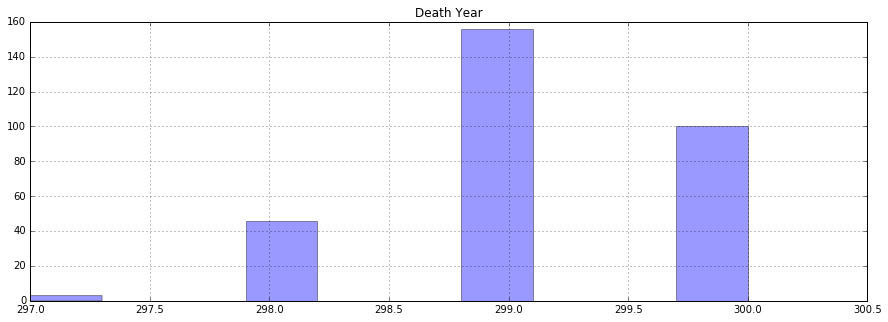

In [252]:

hero_data1.hist(column = 'Death Year', figsize= (15,5), alpha = 0.4)  
filter_year = hero_data1['Death Year'].dropna()
count = Counter(filter_year)

print("Year Death Count")
for k,v in count.items():
    print(k,v)


# Which House suffered the most number of deaths

###### Visually we can see that Houses's Stark and Lannister have the most number of deaths. House Stark at 107 and House Lannister at 102. This is from data collected over the last 5 books. The 3rd house with the most number of deaths is from House GreyJoy standing at 75. One could say that these 3 houses play a big part in the story line. Following House Greyjoy is House Baratheon at 64.

                   0
House Baratheon   64
House Greyjoy     75
House Arryn       30
House Stark      108
House Tyrell      26
House Martell     37
House Targaryen   36
House Tully       30
House Lannister  102


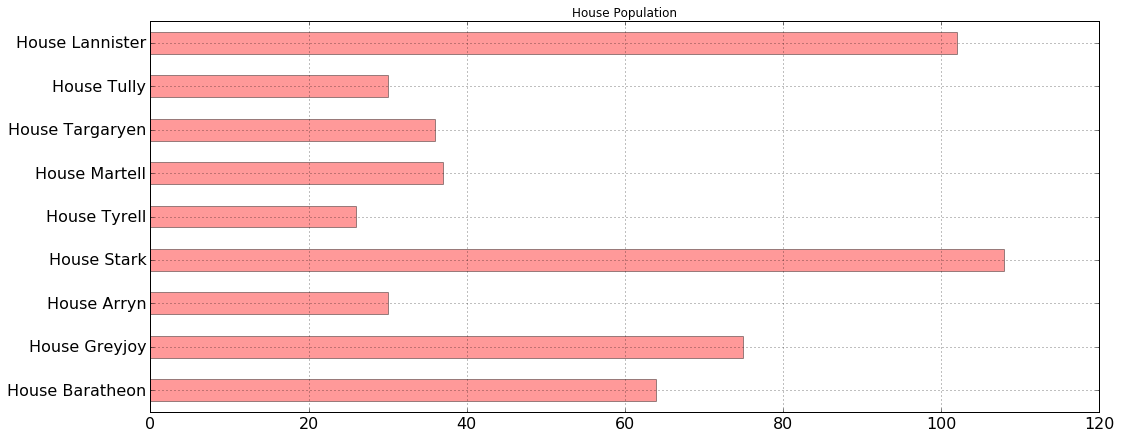

In [390]:
 house_count = Counter(hero_data1['Allegiances'])

#Summing u all the values into one house. People who belonged to stark have been added to house stark.
house_count['House Lannister'] = house_count['Lannister'] + house_count['House Lannister']
house_count['House Stark'] = house_count['Stark'] + house_count['House Stark']
house_count['House Tyrell'] = house_count['Tyrell'] + house_count['House Tyrell']
house_count['House Tully'] = house_count['Tully'] + house_count['House Tully']
house_count['House Targaryen'] = house_count['Targaryen'] + house_count['House Targaryen']
house_count['House Baratheon'] = house_count['Baratheon'] + house_count['House Baratheon']
house_count['House Martell'] = house_count['Martell'] + house_count['House Martell']
house_count['House Arryn'] = house_count['Arryn'] + house_count['House Arryn']
house_count['House Greyjoy'] = house_count['Greyjoy'] + house_count['House Greyjoy']

del(house_count['Greyjoy'], house_count['Arryn'], house_count['Martell'], house_count['Baratheon'], house_count['Targaryen'], house_count['None'], house_count["Night's Watch"], house_count['Wildling'], house_count['Lannister'], house_count['Stark'], house_count['Tyrell'], house_count['Tully'])
df = pd.DataFrame.from_dict(house_count, orient = 'index')
df.plot(kind = 'barh',color='r', title='House Population', alpha = 0.4, grid=True, legend= False, figsize= (17,7), fontsize= 16)
print(df)



# Which book has the highest number of deaths? 
 
###### After analyzing the data for the last 5 books, it looks like the book "A Storm of Swords" has the highest number of deaths standing at 97. There may have been a lot of battles going on resulting the death of a lot of characters or maybe the author grew tired of writing about them and decided to end their story. You'll notice that the book "A Feast for Crows", which came after "A Storm of Swords" has the least number of deaths. The author may have had a change in mood and focussed his attention on another part of the story. "A Dance with Dragons" that came out after "A Feast for Crows" has a higher number of deaths, more than double that of the previous book. The author could have done this to make the book more interesting to the readers. The sixth book in the series, "The Winds of WInter", could have a higher count in deaths.

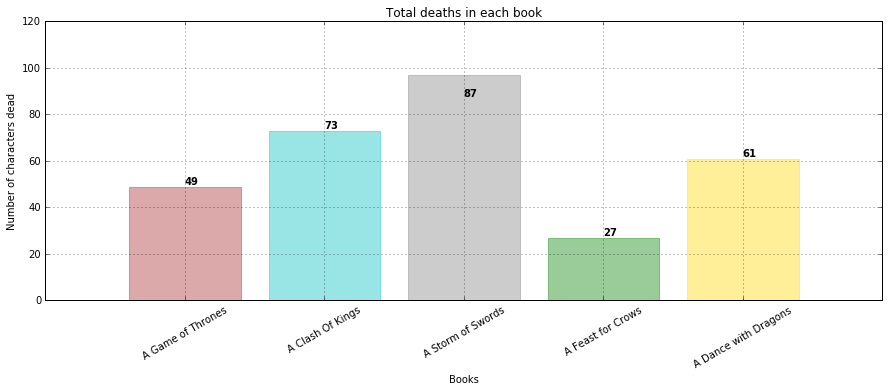

In [387]:
book_data = hero_data1['Book of Death']
filter_books = book_data.dropna()
count_books = Counter(filter_books)

plt.figure(figsize= (15,5))
show = plt.bar(range(len(count_books)), count_books.values(), align = 'center', alpha = 0.4)

show[0].set_color('brown')
show[1].set_color('c')
show[2].set_color('grey')
show[3].set_color('g')
show[4].set_color('gold')
Numbers = [49, 73, 87, 27, 61]
for i, v in enumerate(Numbers):
    plt.text(i, v+1, str(v), color = 'black', fontweight = 'bold')
plt.title('Total deaths in each book')
plt.xlabel('Books')
plt.ylabel('Number of characters dead', horizontalalignment='center')
plt.xticks([0, 1, 2, 3, 4], ['A Game of Thrones','A Clash Of Kings','A Storm of Swords','A Feast for Crows','A Dance with Dragons'], rotation = 30)
plt.yticks([0, 20, 40, 60, 80, 100, 120])
plt.grid()
plt.show()


# Analyzing Battles.csv dataset.

In [261]:
battles = pd.read_csv('C:\\Users\\Ashwin\\Desktop\\GOT data\\battles.csv')
print(battles)

                                                 name  year  battle_number  \
0                          Battle of the Golden Tooth   298              1   
1                         Battle at the Mummer's Ford   298              2   
2                                  Battle of Riverrun   298              3   
3                            Battle of the Green Fork   298              4   
4                       Battle of the Whispering Wood   298              5   
5                                 Battle of the Camps   298              6   
6                                       Sack of Darry   298              7   
7                               Battle of Moat Cailin   299              8   
8                            Battle of Deepwood Motte   299              9   
9                           Battle of the Stony Shore   299             10   
10                         Battle of Torrhen's Square   299             11   
11                               Battle of Winterfell   299     

# Is there a relationship between attacker size and defender size?

In [275]:
attack_defend_df = battles[['attacker_size','defender_size']].dropna()
print(attack_defend_df)

    attacker_size  defender_size
0         15000.0         4000.0
2         15000.0        10000.0
3         18000.0        20000.0
4          1875.0         6000.0
5          6000.0        12625.0
10          244.0          900.0
13          618.0         2000.0
14         6000.0        10000.0
15         5000.0        20000.0
16        20000.0        10000.0
17          100.0          100.0
19        21000.0         7250.0
25         3500.0         3500.0
27       100000.0         1240.0
30         4500.0          200.0
37         5000.0         8000.0


#### The scatterplot shows that there is an outlier measuring at 100,000. On closer examination of this data point we can see that it comes from the 'Battle of Castle Black'. This is an extreme outlier and should be removed to get a better spread of the data.

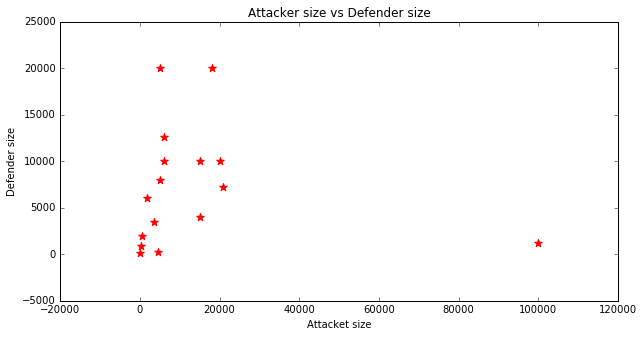

In [298]:
plt.figure(figsize = (10,5))
plt.scatter(attack_defend_df['attacker_size'], attack_defend_df['defender_size'], color = 'r', marker = "*", s = 65)
plt.title("Attacker size vs Defender size")
plt.ylabel("Defender size")
plt.xlabel("Attacket size")

### Removing the Outlier

In [332]:
attack_defend_df = attack_defend_df[attack_defend_df.attacker_size != 100000]
print(attack_defend_df)

    attacker_size  defender_size
0         15000.0         4000.0
2         15000.0        10000.0
3         18000.0        20000.0
4          1875.0         6000.0
5          6000.0        12625.0
10          244.0          900.0
13          618.0         2000.0
14         6000.0        10000.0
15         5000.0        20000.0
16        20000.0        10000.0
17          100.0          100.0
19        21000.0         7250.0
25         3500.0         3500.0
30         4500.0          200.0
37         5000.0         8000.0


### After plotting the data we see a better spread of the data. There appears to be a positive relationship here, i.e, an increase in the size of the attacking army, the bigger is the size of the defending army. 

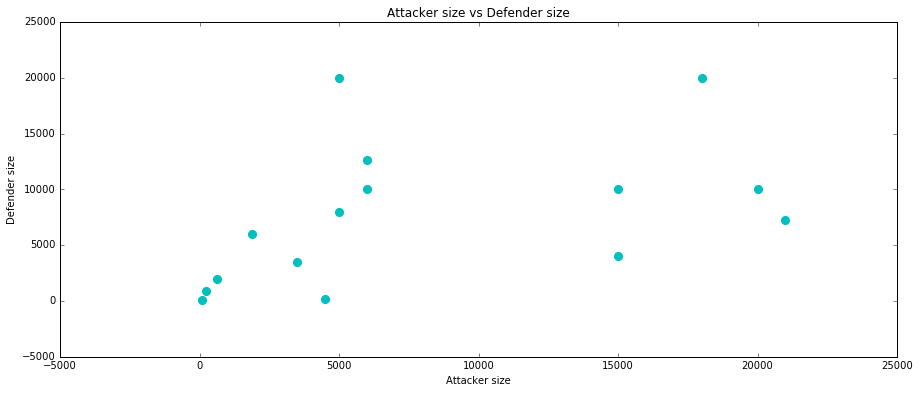

In [344]:
plt.figure(figsize = (15,6))
plt.scatter(attack_defend_df['attacker_size'], attack_defend_df['defender_size'], color = 'c', s = 65)
plt.title("Attacker size vs Defender size")
plt.xlabel('Attacker size')
plt.ylabel('Defender size')

# Sumary Statistics
##### After generating the summary statistics, you can see that average of the attacking army(8122.466) is greater than the defending army (7638.33) . The largest attacking army in this dataset is 21,000 and the largest defending army is 20,000. The standard deviations are large for both armies, which means the data is spread. Not all the values lie close to the mean.

## Comparing mean and median values of the attacking army.

##### The mean(8122.46) is greater than the median(5000), hence we cannot expect the distribution to be normal. More righttly its right skewed. This can be observed in the boxplot titled 'Attacker size'.

## Comparing mean and median values of the defending army.

##### The mean(7638.33) and median(7250) are alost close to each other. Hence, the distribution of this data will be lightly skewed. This can beobserved in the boxplot titled 'Defender size'.

       attacker_size  defender_size
count      15.000000      15.000000
mean     8122.466667    7638.333333
std      7482.599404    6380.221018
min       100.000000     100.000000
25%      2687.500000    2750.000000
50%      5000.000000    7250.000000
75%     15000.000000   10000.000000
max     21000.000000   20000.000000


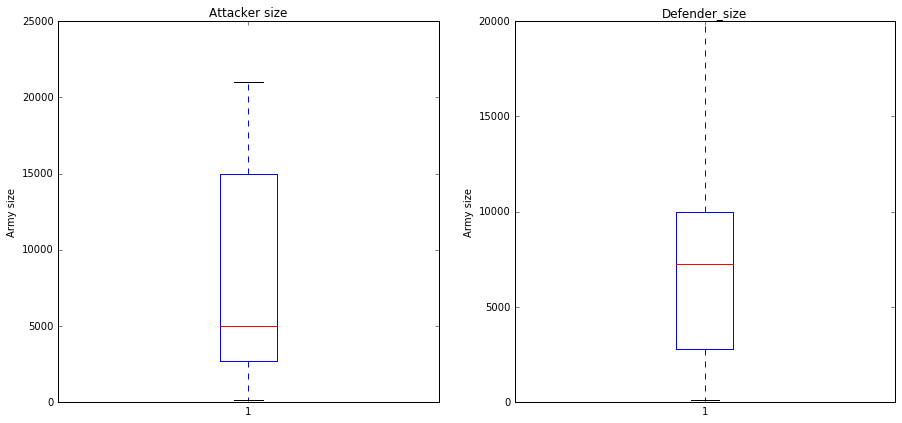

In [381]:
print(attack_defend_df.describe())

fig = plt.figure(figsize = (15, 15))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.boxplot(attack_defend_df.attacker_size)
ax1.set_title("Attacker size")
ax1.set_ylabel("Army size")

ax2.boxplot(attack_defend_df.defender_size)
ax2.set_title("Defender_size")
ax2.set_ylabel("Army size")

##### The covariance(2.0945) is positive which in this case means the larger the attacking army, the defending army also increases in size. I guess the author would do this to make the book more interesting to readers. 

In [337]:
print(attack_defend_df.cov())

               attacker_size  defender_size
attacker_size   5.598929e+07   2.094528e+07
defender_size   2.094528e+07   4.070722e+07


##### The correlation(0.438731) is also positive which shows there is some kind of a relationship but not a very strong one. The correlation value has to lean towards 1 to exhibit a stronger relationship. The author does carefully balance out the proportion of men in both sides of the army. He may do it to lead the readers into beliving that the underdongs have a fighting chance. Overcoming all obstables and emerging victorious. 

In [338]:
print(attack_defend_df.corr())

               attacker_size  defender_size
attacker_size       1.000000       0.438731
defender_size       0.438731       1.000000
